In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import matplotlib as mpl

In [6]:
from scipy import stats

In [7]:
import statsmodels.api as sm

In [8]:
import warnings

In [9]:
from itertools import product

In [10]:
from datetime import datetime

In [11]:
df=pd.read_csv(r"C:\Users\boses\OneDrive\Desktop\Data Science using Python\bitcoin data.csv")

In [12]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [13]:
warnings.filterwarnings('ignore')

In [14]:
plt.style.use('seaborn-poster')

In [15]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [16]:
df.shape

(4857377, 8)

In [17]:
df.Timestamp=pd.to_datetime(df.Timestamp,unit='s')

In [18]:
df.index=df.Timestamp

In [19]:
df=df.resample('D').mean()

In [20]:
df_month=df.resample('M').mean()

In [21]:
df_year=df.resample('A-DEC').mean()

In [22]:
df_Q=df.resample('Q-DEC').mean()

In [23]:
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159
...,...,...,...,...,...,...,...
2021-03-27,55193.240643,55219.665031,55168.757372,55195.415367,1.823877,100884.732367,55193.357260
2021-03-28,55833.608471,55857.735342,55810.425126,55835.012863,1.447939,80632.115263,55832.958824
2021-03-29,56914.886595,56946.213593,56885.242967,56915.629993,3.732887,213754.555988,56913.993819


In [24]:
df_month

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-31,6.208043,6.210657,6.205760,6.208932,5.411459,32.615170,6.208550
2012-02-29,5.253117,5.255079,5.250537,5.252514,8.398000,43.115105,5.252527
2012-03-31,4.963496,4.964408,4.960139,4.961054,15.830074,78.996873,4.962021
2012-04-30,4.976732,4.978059,4.975054,4.976416,19.889152,98.856816,4.976547
...,...,...,...,...,...,...,...
2020-11-30,16530.188884,16540.060546,16519.995766,16530.432867,6.684712,110828.794944,16530.401656
2020-12-31,21810.891586,21825.256165,21796.032856,21811.295270,5.740538,129193.865128,21810.922846
2021-01-31,34553.473084,34593.508742,34511.853676,34553.599446,10.249651,352391.120149,34551.684656


In [25]:
df_year

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-12-31,8.231974,8.234157,8.229290,8.231481,18.475207,157.887208,8.231637
2013-12-31,187.504133,187.756865,187.219807,187.493509,15.585383,3375.286140,187.478951
2014-12-31,525.455487,525.866411,525.031252,525.460748,11.681561,6058.110049,525.436669
2015-12-31,272.237769,272.370361,272.090766,272.235549,14.233247,3937.145717,272.225658
2016-12-31,565.863169,566.039448,565.666282,565.862685,5.352643,3014.493239,565.848537
2017-12-31,3948.500312,3952.368294,3943.770664,3948.434272,9.458096,42334.709636,3948.071514
2018-12-31,7524.614007,7530.173195,7518.662846,7524.592256,7.616045,59299.319192,7524.325312
2019-12-31,7352.465185,7356.791711,7348.013356,7352.181554,5.829440,44716.239486,7352.541280


In [26]:
df_Q

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-03-31,5.479759,5.481586,5.477016,5.479038,9.912412,51.761664,5.479242
2012-06-30,5.326608,5.327696,5.325338,5.326423,22.896866,124.651325,5.326512
2012-09-30,10.026331,10.030034,10.022312,10.025868,19.110227,188.212566,10.026230
2012-12-31,12.033701,12.035802,12.031014,12.033101,21.936309,265.408481,12.033069
2013-03-31,33.020105,33.034041,33.007001,33.020657,18.737255,513.049540,33.019913
2013-06-30,117.076264,117.201023,116.918532,117.057654,9.753889,1108.185816,117.059144
2013-09-30,104.363995,104.417739,104.307147,104.367432,12.772127,1310.244645,104.362106
2013-12-31,491.432302,492.244205,490.529950,491.404582,21.083394,10482.799630,491.351404


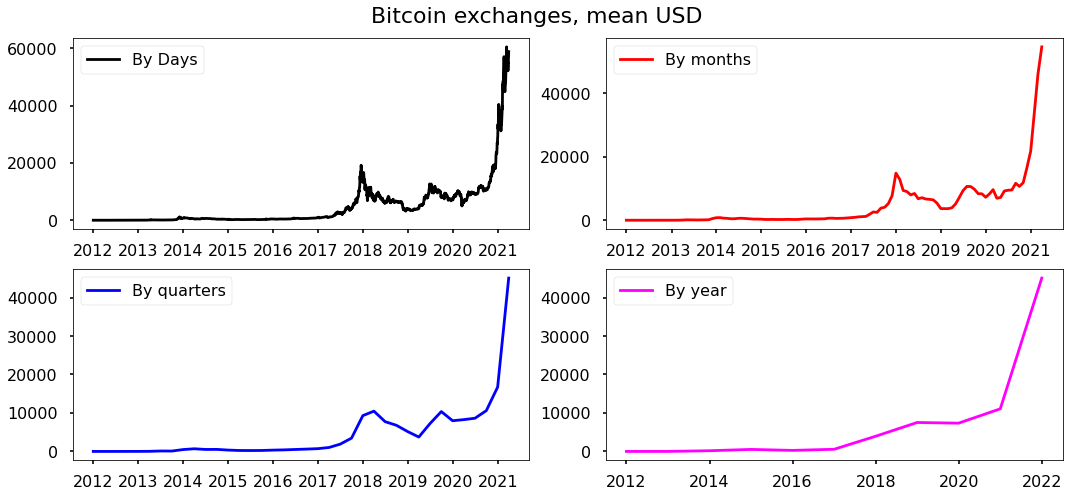

In [27]:
fig=plt.figure(figsize=[15,7])
plt.suptitle('Bitcoin exchanges, mean USD',fontsize=22)
plt.subplot(221)
plt.plot(df.Weighted_Price,'-',label='By Days',color='black')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Weighted_Price,'-',label='By months',color='red')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Weighted_Price,'-',label='By quarters',color='blue')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price,'-',label='By year',color='magenta')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 720x360 with 0 Axes>

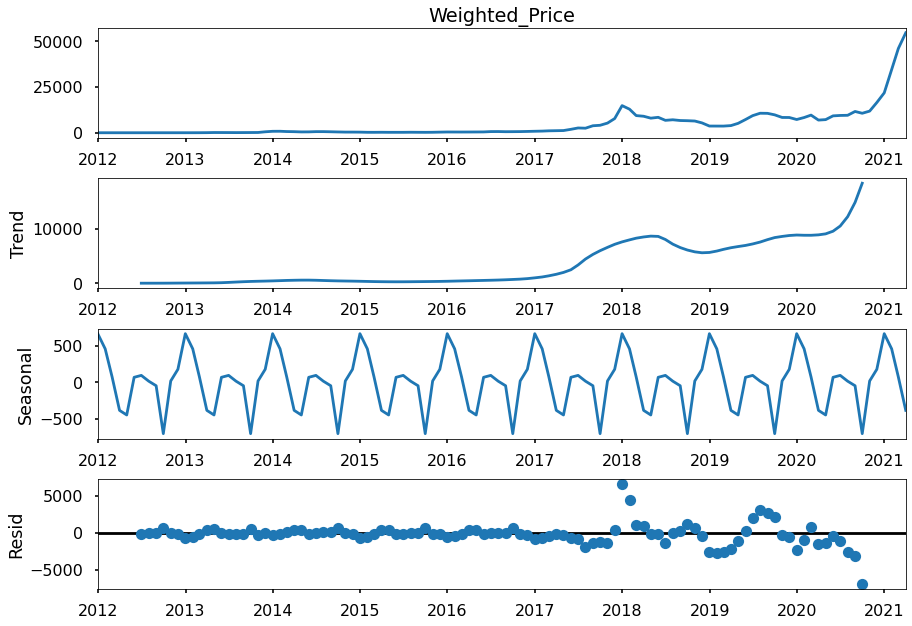

In [28]:
plt.figure(figsize=[10,5])
sm.tsa.seasonal_decompose(df_month['Weighted_Price']).plot()
plt.show()

In [29]:
print("Dickey-Fuller test : p = %f" %sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

Dickey-Fuller test : p = 0.998863


In [30]:
df_month['Weighted_Price_box'],lmbda=stats.boxcox(df_month.Weighted_Price)

In [31]:
print("Dickey-Fuller test : p = %f" %sm.tsa.stattools.adfuller(df_month.Weighted_Price_box)[1])

Dickey-Fuller test : p = 0.925710


In [32]:
df_month['Prices_box_diff']=df_month.Weighted_Price_box-df_month.Weighted_Price_box.shift(12)

In [33]:
print("Dickey-Fuller test : p = %f" %sm.tsa.stattools.adfuller(df_month.Prices_box_diff[12:])[1])

Dickey-Fuller test : p = 0.444282


In [34]:
df_month['Prices_box_diff2']=df_month.Prices_box_diff-df_month.Prices_box_diff.shift(1)

In [35]:
print("Dickey-Fuller test : p = %f" %sm.tsa.stattools.adfuller(df_month.Prices_box_diff2[13:])[1])

Dickey-Fuller test : p = 0.000024


<Figure size 360x360 with 0 Axes>

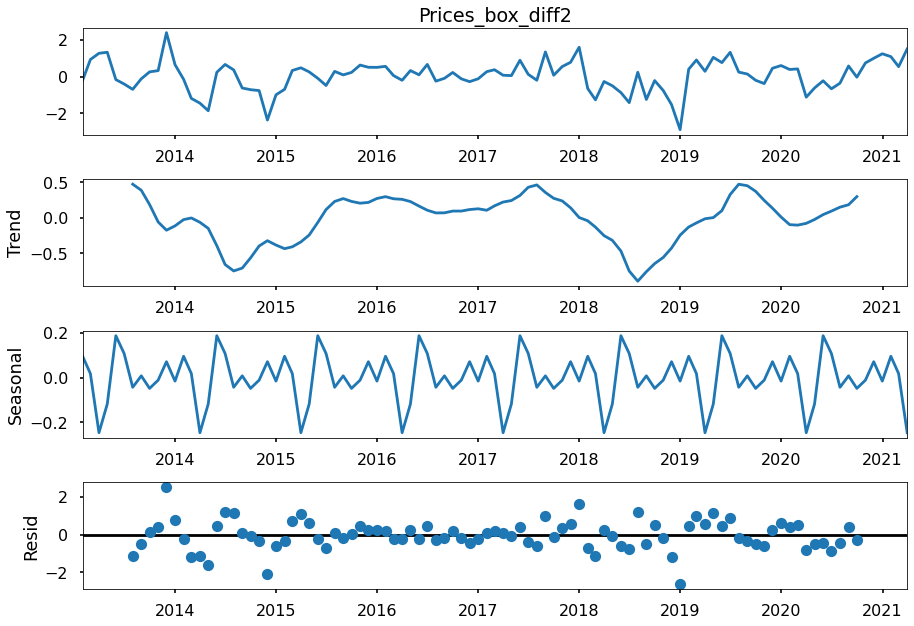

In [36]:
plt.figure(figsize=(5,5))
sm.tsa.seasonal_decompose(df_month.Prices_box_diff2[13:]).plot()
plt.show()

In [37]:
df_month.Prices_box_diff2.describe()

count    99.000000
mean      0.051077
std       0.843415
min      -2.885582
25%      -0.361817
50%       0.130387
75%       0.552975
max       2.404330
Name: Prices_box_diff2, dtype: float64

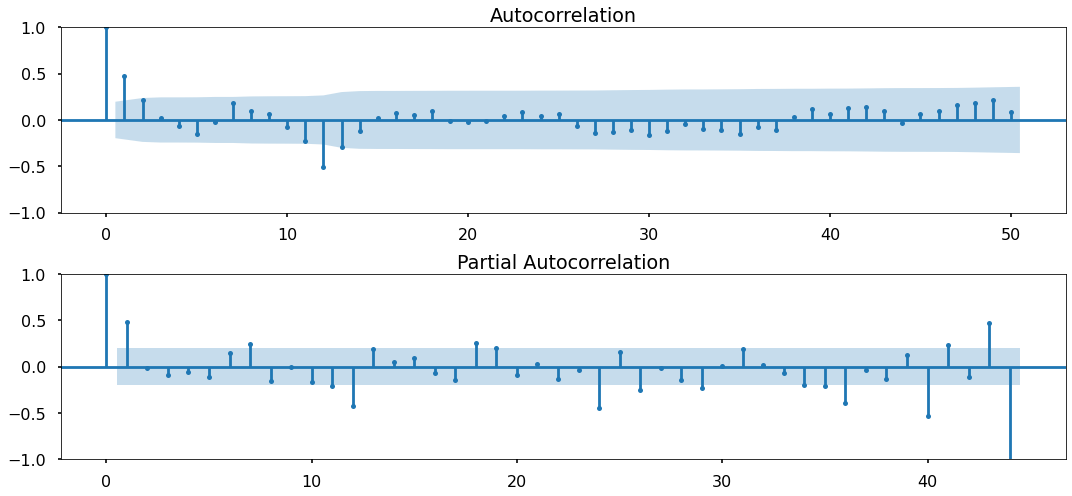

In [38]:
plt.figure(figsize=(15,7))
ax=plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.Prices_box_diff2[13:].values.squeeze(),lags=50,ax=ax)
ax=plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.Prices_box_diff2[13:].values.squeeze(),lags=44,ax=ax)
plt.tight_layout()
plt.show()

In [39]:
Qs=range(0,3)
qs=range(0,3)
Ps=range(0,3)
ps=range(0,3)
D=1
d=1
parameters=product(ps,qs,Ps,Qs)
parameters_list=list(parameters)
len(parameters_list)

81

In [40]:
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = sm.tsa.statespace.SARIMAX(df_month.Prices_box_diff2, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [41]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head(10))
print(best_model.summary())

      parameters         aic
38  (1, 1, 0, 2)  416.849642
41  (1, 1, 1, 2)  417.911132
20  (0, 2, 0, 2)  418.308012
23  (0, 2, 1, 2)  418.726221
65  (2, 1, 0, 2)  418.738279
47  (1, 2, 0, 2)  418.748053
44  (1, 1, 2, 2)  419.391837
43  (1, 1, 2, 1)  419.591890
50  (1, 2, 1, 2)  419.890967
68  (2, 1, 1, 2)  420.055176
                                        SARIMAX Results                                        
Dep. Variable:                        Prices_box_diff2   No. Observations:                  112
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -203.425
Date:                                 Sun, 28 Aug 2022   AIC                            416.850
Time:                                         23:33:15   BIC                            429.825
Sample:                                     12-31-2011   HQIC                           422.100
                                          - 03-31-2021                                         
Covarianc

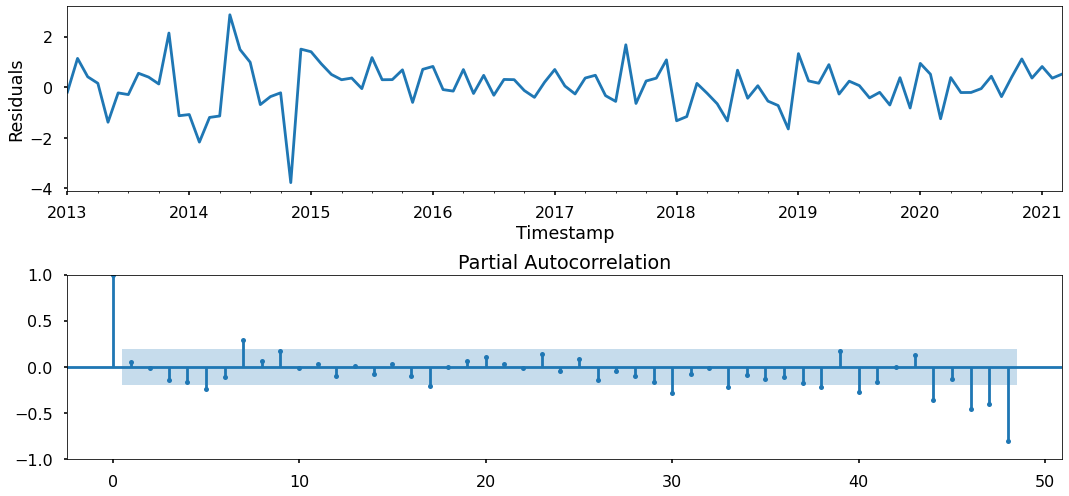

In [42]:
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel('Residuals')
ax=plt.subplot(212)
sm.graphics.tsa.plot_pacf(best_model.resid[13:].values.squeeze(),lags=48,ax=ax)
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Density'>

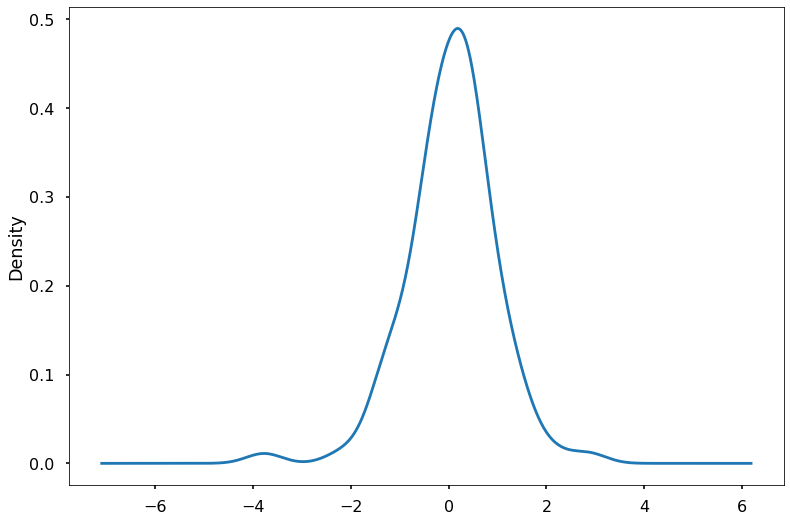

In [43]:
best_model.resid.plot(kind='kde')

In [44]:
sm.stats.durbin_watson(best_model.resid[13:].values)

1.8881115432298061

In [45]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [46]:
acorr_ljungbox(best_model.resid[13:],lags=6)

,lb_stat,lb_pvalue
1,0.255539,0.613202
2,0.265985,0.875472
3,2.210403,0.529902
4,5.327438,0.255319
5,10.600705,0.059897
6,11.164360,0.083428


In [47]:
def invboxcox(y,lmdba):
    if lmbda==0 :
        return(np.exp(y))
    else :
        return(np.exp(np.log(lmbda*y+1)/lmbda))

In [48]:
print(df_month['Prices_box_diff2'])

Timestamp
2011-12-31         NaN
2012-01-31         NaN
2012-02-29         NaN
2012-03-31         NaN
2012-04-30         NaN
                ...   
2020-11-30    1.005884
2020-12-31    1.252846
2021-01-31    1.096366
2021-02-28    0.549864
2021-03-31    1.518910
Freq: M, Name: Prices_box_diff2, Length: 112, dtype: float64


In [49]:
invboxcox(df_month['Prices_box_diff2'],param)

Timestamp
2011-12-31         NaN
2012-01-31         NaN
2012-02-29         NaN
2012-03-31         NaN
2012-04-30         NaN
                ...   
2020-11-30    2.590887
2020-12-31    3.224147
2021-01-31    2.808790
2021-02-28    1.704431
2021-03-31    4.056315
Freq: M, Name: Prices_box_diff2, Length: 112, dtype: float64

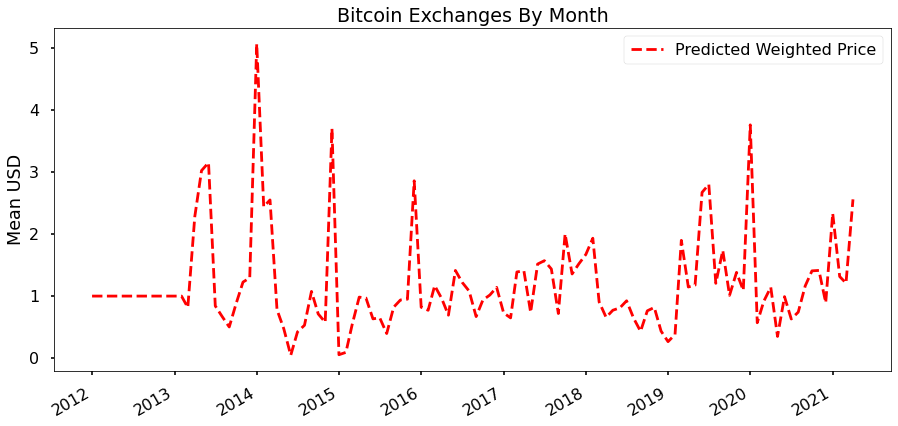

In [50]:
df_month2=df_month[['Prices_box_diff2']]
date_list=[datetime(2020,6,30),datetime(2020,7,31),datetime(2020,8,31),datetime(2020,9,30),datetime(2020,10,31),datetime(2020,11,30),datetime(2020,12,31),datetime(2021,1,31),datetime(2021,2,28)]
future=pd.DataFrame(index=date_list,columns=df_month.columns)
df_month2=pd.concat([df_month2,future])
df_month2['forecast']=invboxcox(best_model.predict(start=0,end=180),param)
plt.figure(figsize=(15,7))
df_month2.forecast.plot(color='r',ls='--',label='Predicted Weighted Price')
plt.legend()
plt.title('Bitcoin Exchanges By Month')
plt.ylabel('Mean USD')
plt.show()